
# **UNDERSTANDING THE PROBLEM STATMENT AND BUSINESS CASE**

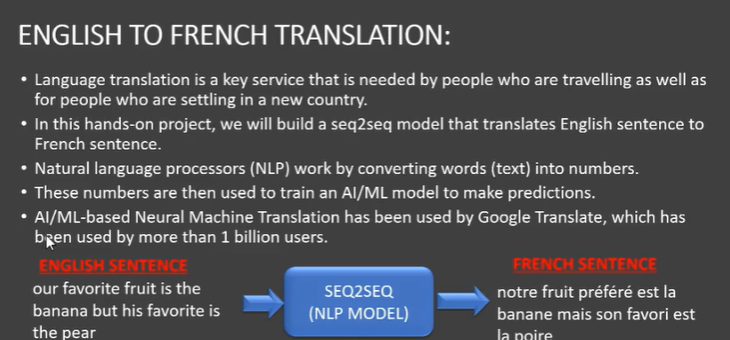

#IMPORTING LIBRARIES AND DATASETS

In [1]:
!pip install --upgrade tensorflow-gpu==2.0

In [2]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install jupyterthemes

In [8]:
from collections import Counter
import operator
# import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# import gensim
# from gensim.utils import simple_preprocess
# from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [9]:
!pip install plotly --upgrade

In [10]:
# load the data
df_english = pd.read_csv('/content/small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('/content/small_vocab_fr.csv', sep = '/t', names = ['french'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [11]:
df_english.head()

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [12]:
df_french.head()

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


In [13]:
print(df_english.shape)
print(df_english.isnull().sum())

(137860, 1)
english    0
dtype: int64


In [14]:
print(df_french.shape)
print(df_french.isnull().sum())

(137860, 1)
french    0
dtype: int64


In [15]:
df=pd.concat([df_english,df_french],axis=1)
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


#DATA CLEANING

In [16]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [18]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [19]:
english_words = []
french_words  = []

# **Unique words**





In [20]:
def get_unique_words(x,word_list):
  for word in x.split():
    if word not in word_list:
      word_list.append(word)


df["english"].apply(lambda x: get_unique_words(x,english_words))
df["french"].apply(lambda x: get_unique_words(x,french_words))

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [21]:
len(english_words)

199

In [22]:
len(french_words)

350

# VISUALIZING CLEANED UP DATASET

In [23]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [24]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [25]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [26]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [27]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [28]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [29]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

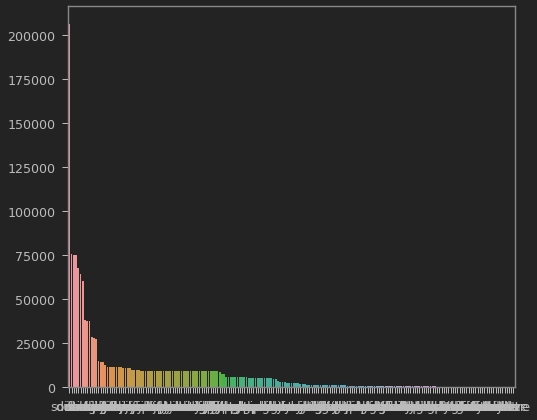

In [30]:
# Plot barplot using plotly 
sns.barplot(x = english_words, y = english_counts)

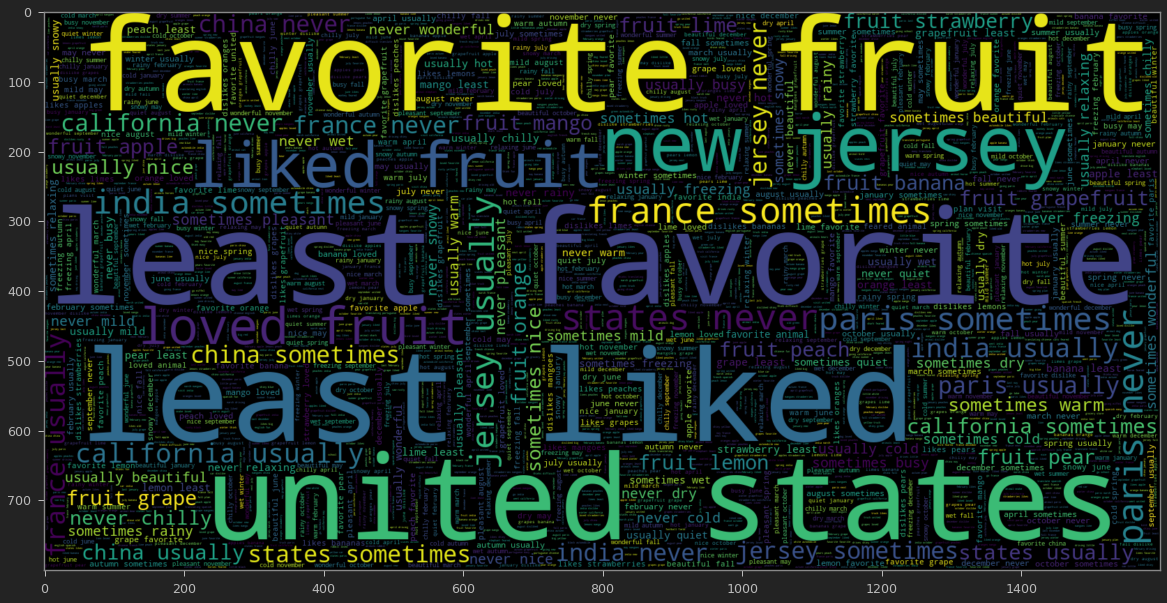

In [31]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [32]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [33]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [34]:
# Obtain list of all words in the dataset
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [35]:
# Obtain the total count of words
french_words_counts = Counter(words)
french_words_counts

Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [36]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [37]:
# append the values to a list for visualization purposes
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

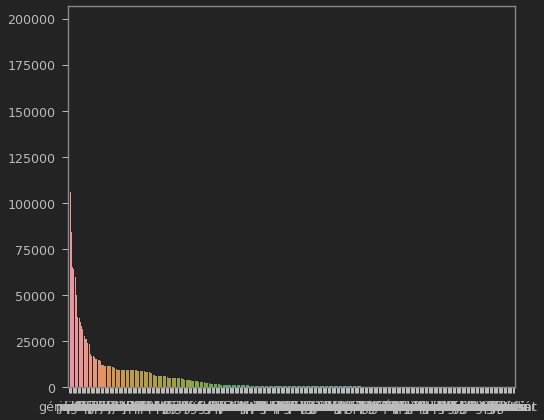

In [38]:
# Plot barplot using plotly 
sns.barplot(x = french_words, y = french_counts)


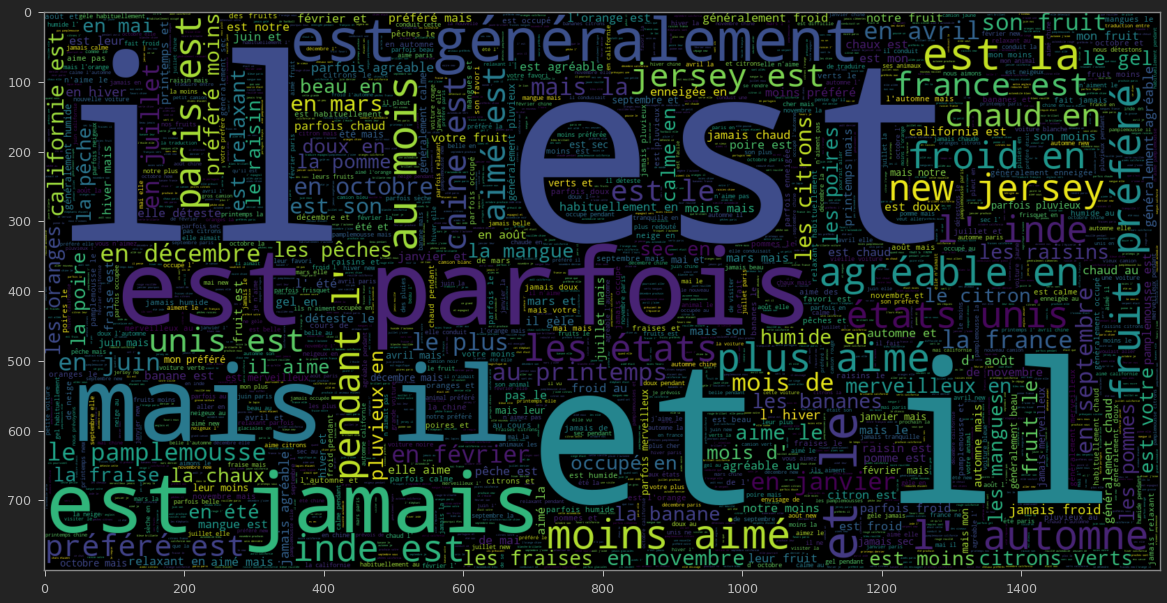

In [39]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [40]:
df.french[0]
nltk.word_tokenize(df.french[0])

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 "'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril']

In [41]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


# PREPARING THE DATA BY PERFORMING TOKENIZATION AND PADDING

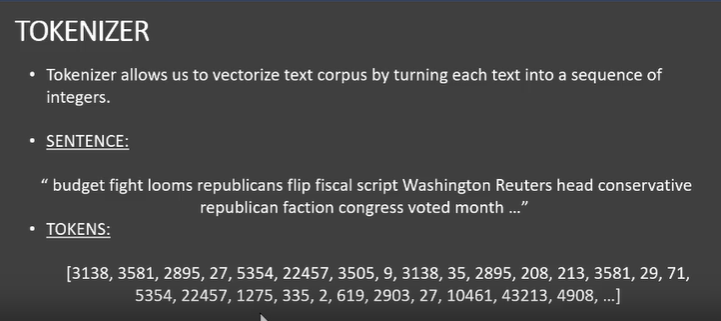

In [42]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [43]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [44]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [45]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [46]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [47]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [48]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

#Change the padding length so that both english and french have the same length

In [49]:
# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# number of unique words in english
total_english_words  = len(english_words)
total_english_words

# number of unique words in french
total_french_words = len(french_words)
total_french_words

350

In [ ]:
english_vocab_size=total_english_words+1
french_vocab_size=total_french_words+1

#UNDERSTANDING THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM


# UNDERSTANDING THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS

# BUILD AND TRAIN THE MODEL 

In [51]:
!pip install numpy==1.19.5

In [52]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [53]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [54]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 35s 313us/sample - loss: 2.7382 - accuracy: 0.4927 - val_loss: 2.1440 - val_accuracy: 0.5427
Epoch 2/10
111666/111666 [==============================] - 20s 176us/sample - loss: 1.8847 - accuracy: 0.5705 - val_loss: 1.6203 - val_accuracy: 0.6001
Epoch 3/10
111666/111666 [==============================] - 20s 179us/sample - loss: 1.5114 - accuracy: 0.6173 - val_loss: 1.3886 - val_accuracy: 0.6395
Epoch 4/10
111666/111666 [==============================] - 21s 190us/sample - loss: 1.2986 - accuracy: 0.6538 - val_loss: 1.2219 - val_accuracy: 0.6621
Epoch 5/10
111666/111666 [==============================] - 20s 180us/sample - loss: 1.1423 - accuracy: 0.6792 - val_loss: 1.0616 - val_accuracy: 0.6985
Epoch 6/10
111666/111666 [==============================] - 20s 178us/sample - loss: 0.9918 - accuracy: 0.7183 - val_loss: 0.9467 - val_accuracy: 0.7288
Epoch 7/10
111666/111666 [=====

In [55]:
# save the model
model.save("weights.h5")

Training the model with different embedding output dimension and comment on model performance during training


In [55]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(english_vocab_size, 128, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = Adam(lr = 1e-3), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

#ASSESSING TRAINED MODEL PERFORMANCE


In [56]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [57]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the united states is usually relaxing during february and it is sometimes quiet in winter

Original French word - les états unis est relaxant habituellement en février et il est parfois calme en hiver        

Predicted French word - les états unis est généralement agréable en février et il est généralement en en hiver        




Original English word - the lemon is her least liked fruit but the mango is his least liked 

Original French word - le citron est la moins aimé des fruits mais la mangue est son moins aimé        

Predicted French word - le citron est son fruit aimé aimé fruits mais la fraise est est moins aimé        




Original English word - india is nice during april but it is freezing in autumn    

Original French word - l' inde est belle en avril mais il gèle à l' automne           

Predicted French word - l' inde est froid en avril mais il est à l' l'           




Original English word - france is dry during january and it is never mild 